# Supermart Grocery Sales - Retail Analytics Dataset

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline
from datetime import datetime
from dython.nominal import associations

In [42]:
record = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")
record.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [43]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [44]:
# Shape of the dataframe
record.shape

(9994, 11)

# Convert the Order date to datetime

In [45]:
record["Order Date"] = pd.to_datetime(record["Order Date"])

# Lets answer the following questions
1. which category of product is most profitable?
2.  Region with highest sales by product
3. which region by state made highest and lowest profit ?
4. Average sales volume for each year? 
5. Any repeating customer
6. Most dicounted and profitable product category

## Checking feature relationships, if there are any correleation between them =>  you can see profit increases as sales increses(postive correlation)

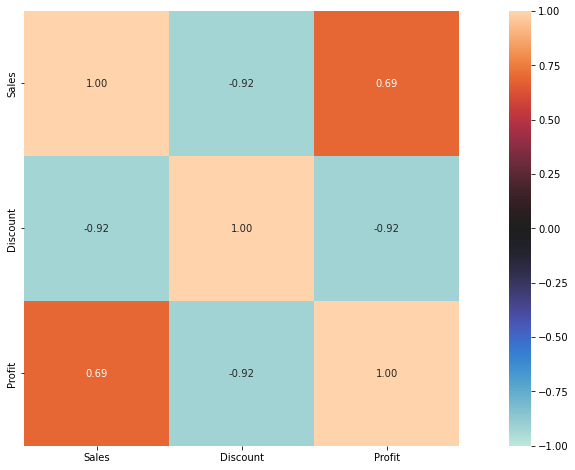

{'corr':              Sales  Discount    Profit
 Sales     1.000000 -0.922877  0.694809
 Discount -0.922877  1.000000 -0.918181
 Profit    0.694809 -0.918181  1.000000,
 'ax': <AxesSubplot:>}

In [46]:
associations(record.corr(),figsize =(18,8))

# which category of product is most profitable?

In [47]:
profitable_prod = record.loc[:,["Category","Profit"]].groupby(["Category"]).sum().sort_values\
    ("Profit",ascending  = False)
profitable_prod

,Profit
Category,
Snacks,568178.85
"Eggs, Meat & Fish",567357.22
Fruits & Veggies,530400.38
Food Grains,529162.64
Bakery,528521.06
Beverages,525605.76
Oil & Masala,497895.29


In [48]:
record.Profit.sum()

3747121.1999999997

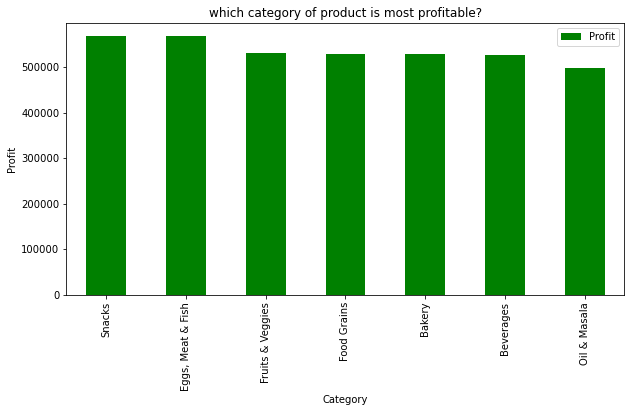

In [49]:
# ploting a bar chart to show the table
fig,ax = plt.subplots(figsize = (10, 5))
profitable_prod.plot( ax = ax, kind = 'bar', color = 'green', ylabel =\
     "Profit", title = "which category of product is most profitable?");

# Region with highest sales by product

In [50]:
rsp =record.loc[:,["Region","Category","Sales"]].groupby(["Region","Category"]).sum().sort_values("Sales",ascending = False)
rsp

Sales
Region  Category                 
West    Bakery             714312
        Eggs, Meat & Fish  711966
        Food Grains        699652
        Snacks             689780
East    Eggs, Meat & Fish  677830
West    Oil & Masala       662965
        Beverages          662247
        Fruits & Veggies   657821
East    Oil & Masala       622071
        Snacks             619915
        Food Grains        598868
        Bakery             588241
        Beverages          577206
        Fruits & Veggies   564237
Central Snacks             558494
        Fruits & Veggies   526507
        Eggs, Meat & Fish  516642
        Beverages          501194
        Food Grains        463683
        Oil & Masala       453293
        Bakery             448343
South   Snacks             369357
        Bakery             361385
        Eggs, Meat & Fish  360963
        Food Grains        353069
        Fruits & Veggies   352162
        Beverages          344666
        Oil & Masala       298859
North   Oil & Masala         1254

<AxesSubplot:xlabel='Region,Category'>

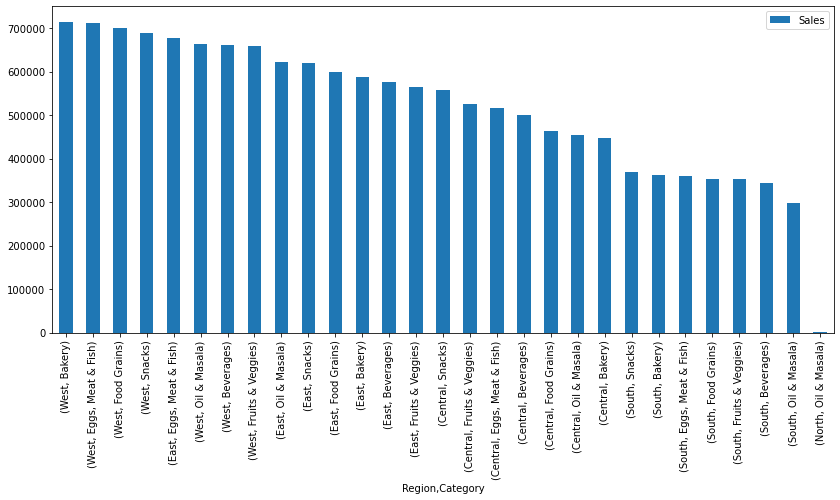

In [51]:
fig,ax = plt.subplots(figsize = (10, 4))
rsp.plot(kind = "bar", figsize = (14,6), ax= ax)

# Which region by state made highest and lowest profit ?

In [52]:
region_profit = record.loc[:,["Region","State","Profit"]].groupby(["Region","State"]).sum().sort_values("Profit",ascending= False)
region_profit

,,Profit
Region,State,
West,Tamil Nadu,1192004.61
East,Tamil Nadu,1074345.58
Central,Tamil Nadu,856806.84
South,Tamil Nadu,623562.89
North,Tamil Nadu,401.28


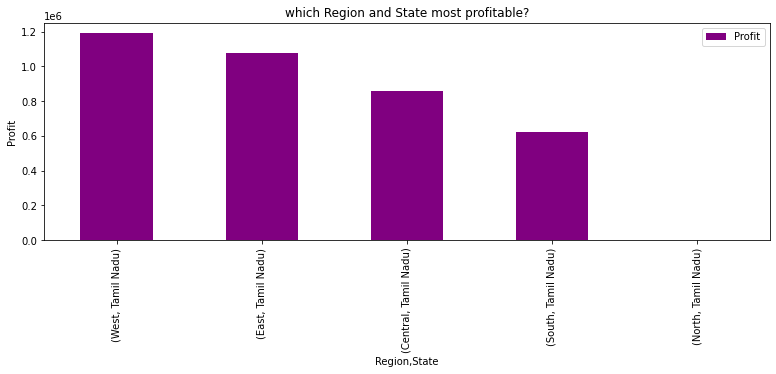

In [53]:
fig,ax = plt.subplots(figsize = (13, 4))
region_profit.plot(kind = "bar", ax= ax, color =["purple"],  ylabel =\
     "Profit", title = "which Region and State most profitable?" );


# Average sales volume for each year? 

In [54]:
record["year"] = record["Order Date"].dt.year

In [55]:
yearly_profit = record.loc[:,["year","Profit"]].sort_values('Profit',ascending = False).set_index("year").groupby("year").sum().\
    sort_values("Profit", ascending= False).reset_index().set_index("year")
yearly_profit 

,Profit
year,
2018,1244182.88
2017,953216.22
2016,797192.99
2015,752529.11


# 93k average profit

In [56]:
yearly_profit.mean()

Profit    936780.3
dtype: float64

# Year with highest profit 

array([<AxesSubplot:ylabel='Profit'>], dtype=object)

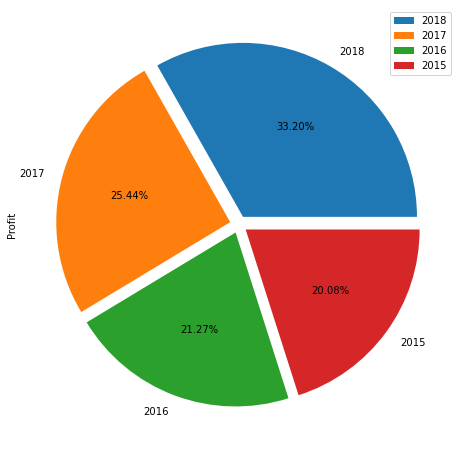

In [57]:
yearly_profit.plot(kind = "pie", subplots = True, figsize =(8,8),autopct = "%1.2f%%", explode = [0.05,0.05,0.05,0.05])

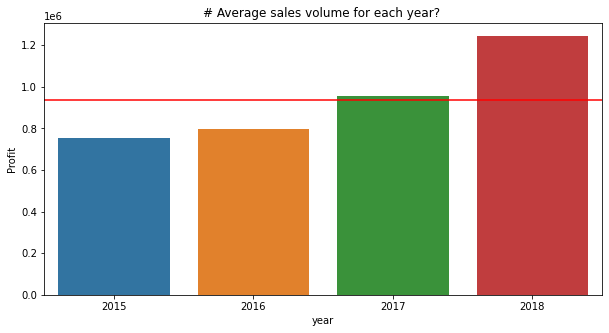

In [58]:
fig,ax = plt.subplots(figsize = (10, 5))
ax.axhline(yearly_profit.Profit.mean(), color='red', linestyle='-')
sns.barplot(x =yearly_profit.index, y=yearly_profit.Profit)
ax.set( xlabel ="year", ylabel= "Profit", title ="# Average sales volume for each year? " );

# Any repeating Unique customer name over the years?

# 50 Unique Customer names

In [59]:
record["Customer Name"].nunique()

50

In [60]:
cust_cat = record.loc[:,["Customer Name",'Profit']].groupby("Customer Name").sum()
cust_cat[:10]

,Profit
Customer Name,
Adavan,78044.29
Aditi,78439.05
Akash,82121.26
Alan,74410.23
Amrish,80191.89
Amy,79159.94
Anu,70238.28
Arutra,87572.40
Arvind,71767.23


# The most profitable product

In [68]:
dis_prod = record.loc[:,["Category","Sub Category", "Discount"]].groupby(["Category"]).sum()\
    .sort_values(["Discount"], ascending = False)
dis_prod

,Discount
Category,
"Eggs, Meat & Fish",339.41
Snacks,336.18
Fruits & Veggies,325.14
Beverages,322.46
Food Grains,319.51
Bakery,318.53
Oil & Masala,305.58


[Text(0.5, 1.0, 'Most profitable Category')]

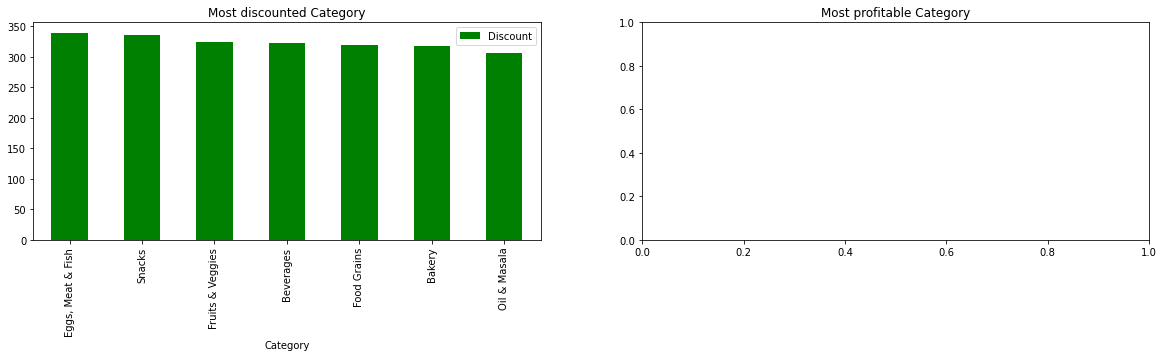

In [69]:
fig,(ax1,ax2) =plt.subplots(nrows = 1, ncols=2, figsize = (20,4))
dis_prod.plot(kind = "bar", y = 'Discount',ax=ax1, color = 'green')
# dis_prod.plot(kind = "bar", y = 'Profit',ax=ax2)
ax1.set(title ="Most discounted Category")
ax2.set(title ="Most profitable Category")

#  most discounted category is BEVERAGES, which is also the most profitable over the years
